In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [3]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [4]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
feature['Date'] = pd.to_datetime(feature['Date'], format = "%d/%m/%Y")

In [13]:
sales['Date'] = pd.to_datetime(sales['Date'], format = "%d/%m/%Y")

In [14]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])

In [17]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [18]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [19]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [20]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [22]:
x = '2010-05-02'
str(x).split('-')

['2010', '05', '02']

In [23]:
def get_month(x):
    return int(str(x).split('-')[1])

In [24]:
df['month'] = df['Date'].apply(get_month)

In [25]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,10
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,10


<Axes: >

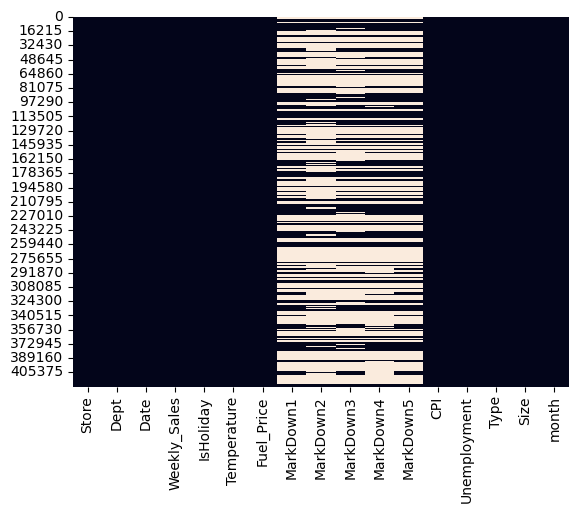

In [26]:
sns.heatmap(df.isnull(), cbar = False)

In [27]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
dtype: int64

In [28]:
df = df.fillna(0)

In [29]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,10
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,10


In [30]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.449510
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.243217


In [31]:
df.duplicated().sum()

0

In [32]:
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [33]:
df['IsHoliday'] = df['IsHoliday'].replace({True:1, False: 0})

/tmp/ipykernel_30890/3275103170.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsHoliday'] = df['IsHoliday'].replace({True:1, False: 0})


In [34]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,10
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,10


In [35]:
result = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date','Store','Dept'], aggfunc = np.mean)

/tmp/ipykernel_30890/2600664539.py:1: FutureWarning: The provided callable <function mean at 0x7fdcd52fd090> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date','Store','Dept'], aggfunc = np.mean)


In [36]:
result

Type                          A         B   C
Date       Store Dept                        
2010-02-05 1     1     24924.50       NaN NaN
                 2     50605.27       NaN NaN
                 3     13740.12       NaN NaN
                 4     39954.04       NaN NaN
                 5     32229.38       NaN NaN
...                         ...       ...  ..
2012-10-26 45    93         NaN   2487.80 NaN
                 94         NaN   5203.31 NaN
                 95         NaN  56017.47 NaN
                 97         NaN   6817.48 NaN
                 98         NaN   1076.80 NaN

[421570 rows x 3 columns]

In [37]:
result.describe()

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [38]:
result

Type                          A         B   C
Date       Store Dept                        
2010-02-05 1     1     24924.50       NaN NaN
                 2     50605.27       NaN NaN
                 3     13740.12       NaN NaN
                 4     39954.04       NaN NaN
                 5     32229.38       NaN NaN
...                         ...       ...  ..
2012-10-26 45    93         NaN   2487.80 NaN
                 94         NaN   5203.31 NaN
                 95         NaN  56017.47 NaN
                 97         NaN   6817.48 NaN
                 98         NaN   1076.80 NaN

[421570 rows x 3 columns]

In [39]:
result.describe()

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [40]:
result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date','Store','Dept'], aggfunc = {'MarkDown1': np.mean, 'MarkDown2': np.mean, 'MarkDown3': np.mean, 'MarkDown4': np.mean, 'MarkDown5': np.mean})


/tmp/ipykernel_30890/3013593610.py:1: FutureWarning: The provided callable <function mean at 0x7fdcd52fd090> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date','Store','Dept'], aggfunc = {'MarkDown1': np.mean, 'MarkDown2': np.mean, 'MarkDown3': np.mean, 'MarkDown4': np.mean, 'MarkDown5': np.mean})


In [41]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-02-05 1     1         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 2         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 3         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 4         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 5         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-10-26 45    93     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 94     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 95     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 97     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 98     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-02-05 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-10-26 45    93      858.33 NaN  
                 94      858.33 NaN  
                 95      858.33 NaN  
                 97      858.33 NaN  
                 98      858.33 NaN  

[421570 rows x 10 columns]

In [42]:
result_md.sum()

           IsHoliday
MarkDown1  0            1.017371e+09
           1            7.452684e+07
MarkDown2  0            2.310619e+08
           1            1.399088e+08
MarkDown3  0            2.460332e+07
           1            1.727284e+08
MarkDown4  0            4.196331e+08
           1            3.698298e+07
MarkDown5  0            6.585670e+08
           1            4.240793e+07
dtype: float64

In [43]:
result_md.describe()

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [45]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,10
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,10


In [46]:
corr_matrix = df.drop(columns = ['Store','Type']).corr()

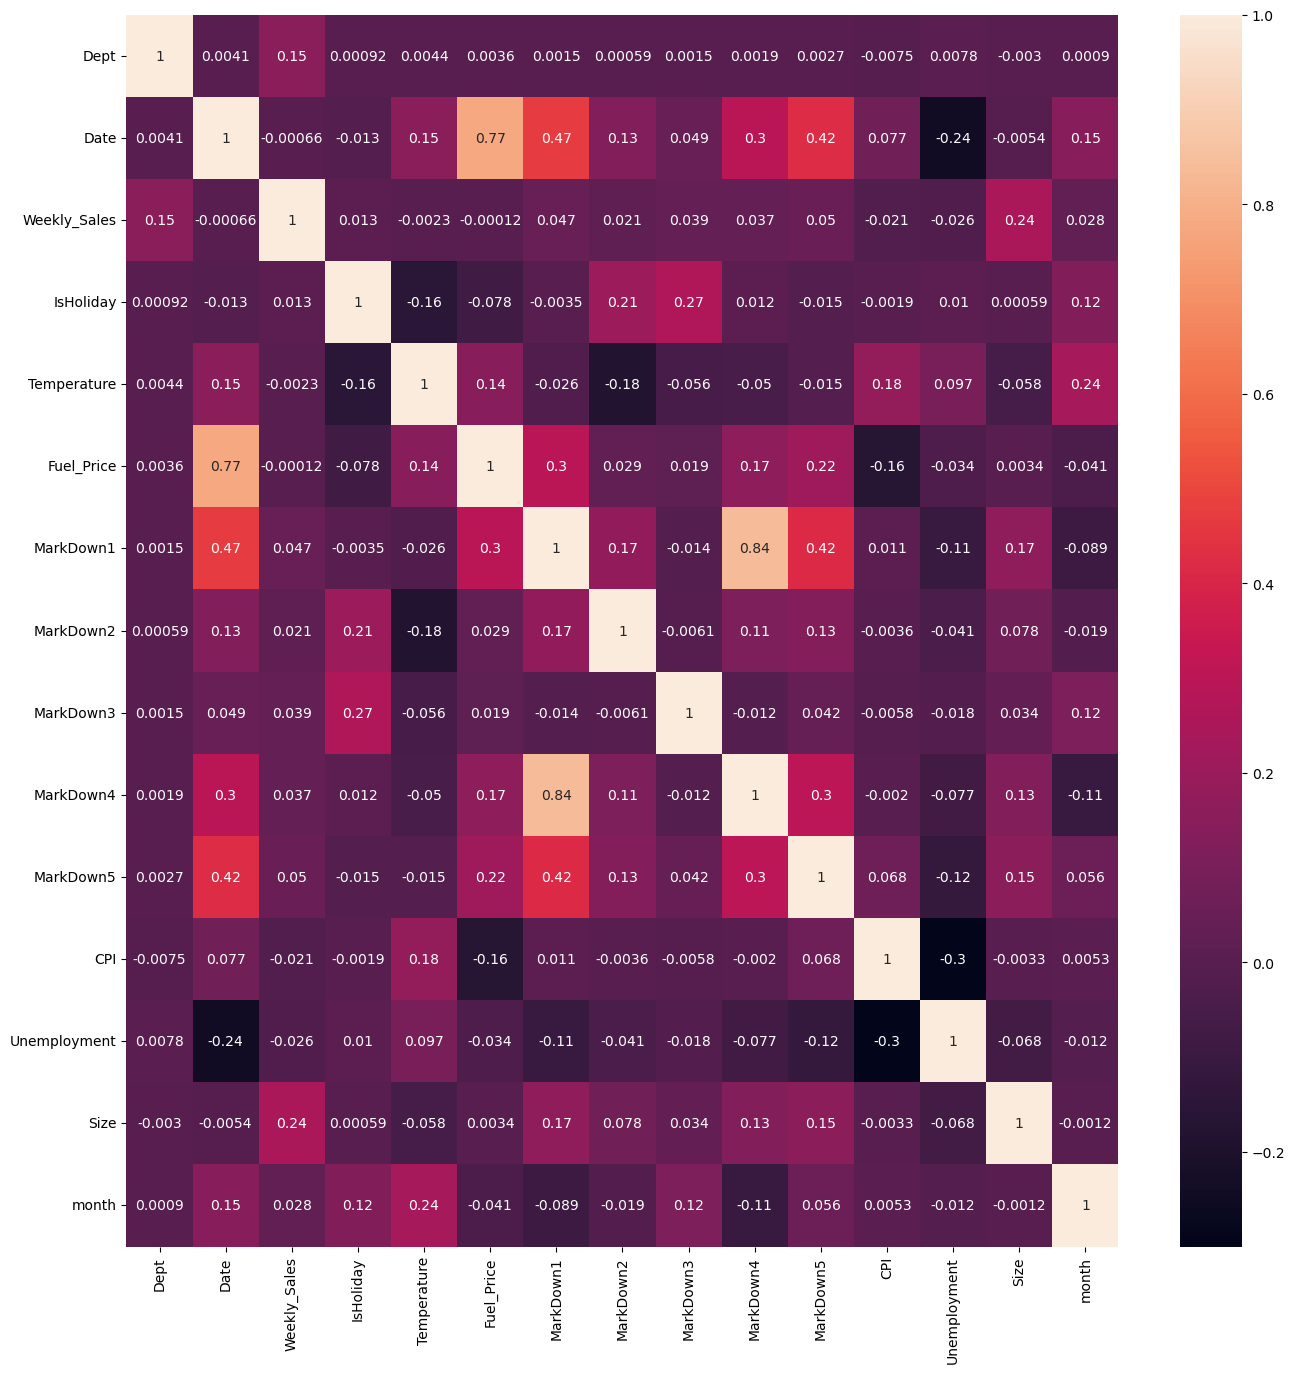

In [47]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [48]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,10
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,10


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Dept'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Weekly_Sales'}>],
       [<Axes: title={'center': 'IsHoliday'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'MarkDown1'}>],
       [<Axes: title={'center': 'MarkDown2'}>,
        <Axes: title={'center': 'MarkDown3'}>,
        <Axes: title={'center': 'MarkDown4'}>,
        <Axes: title={'center': 'MarkDown5'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

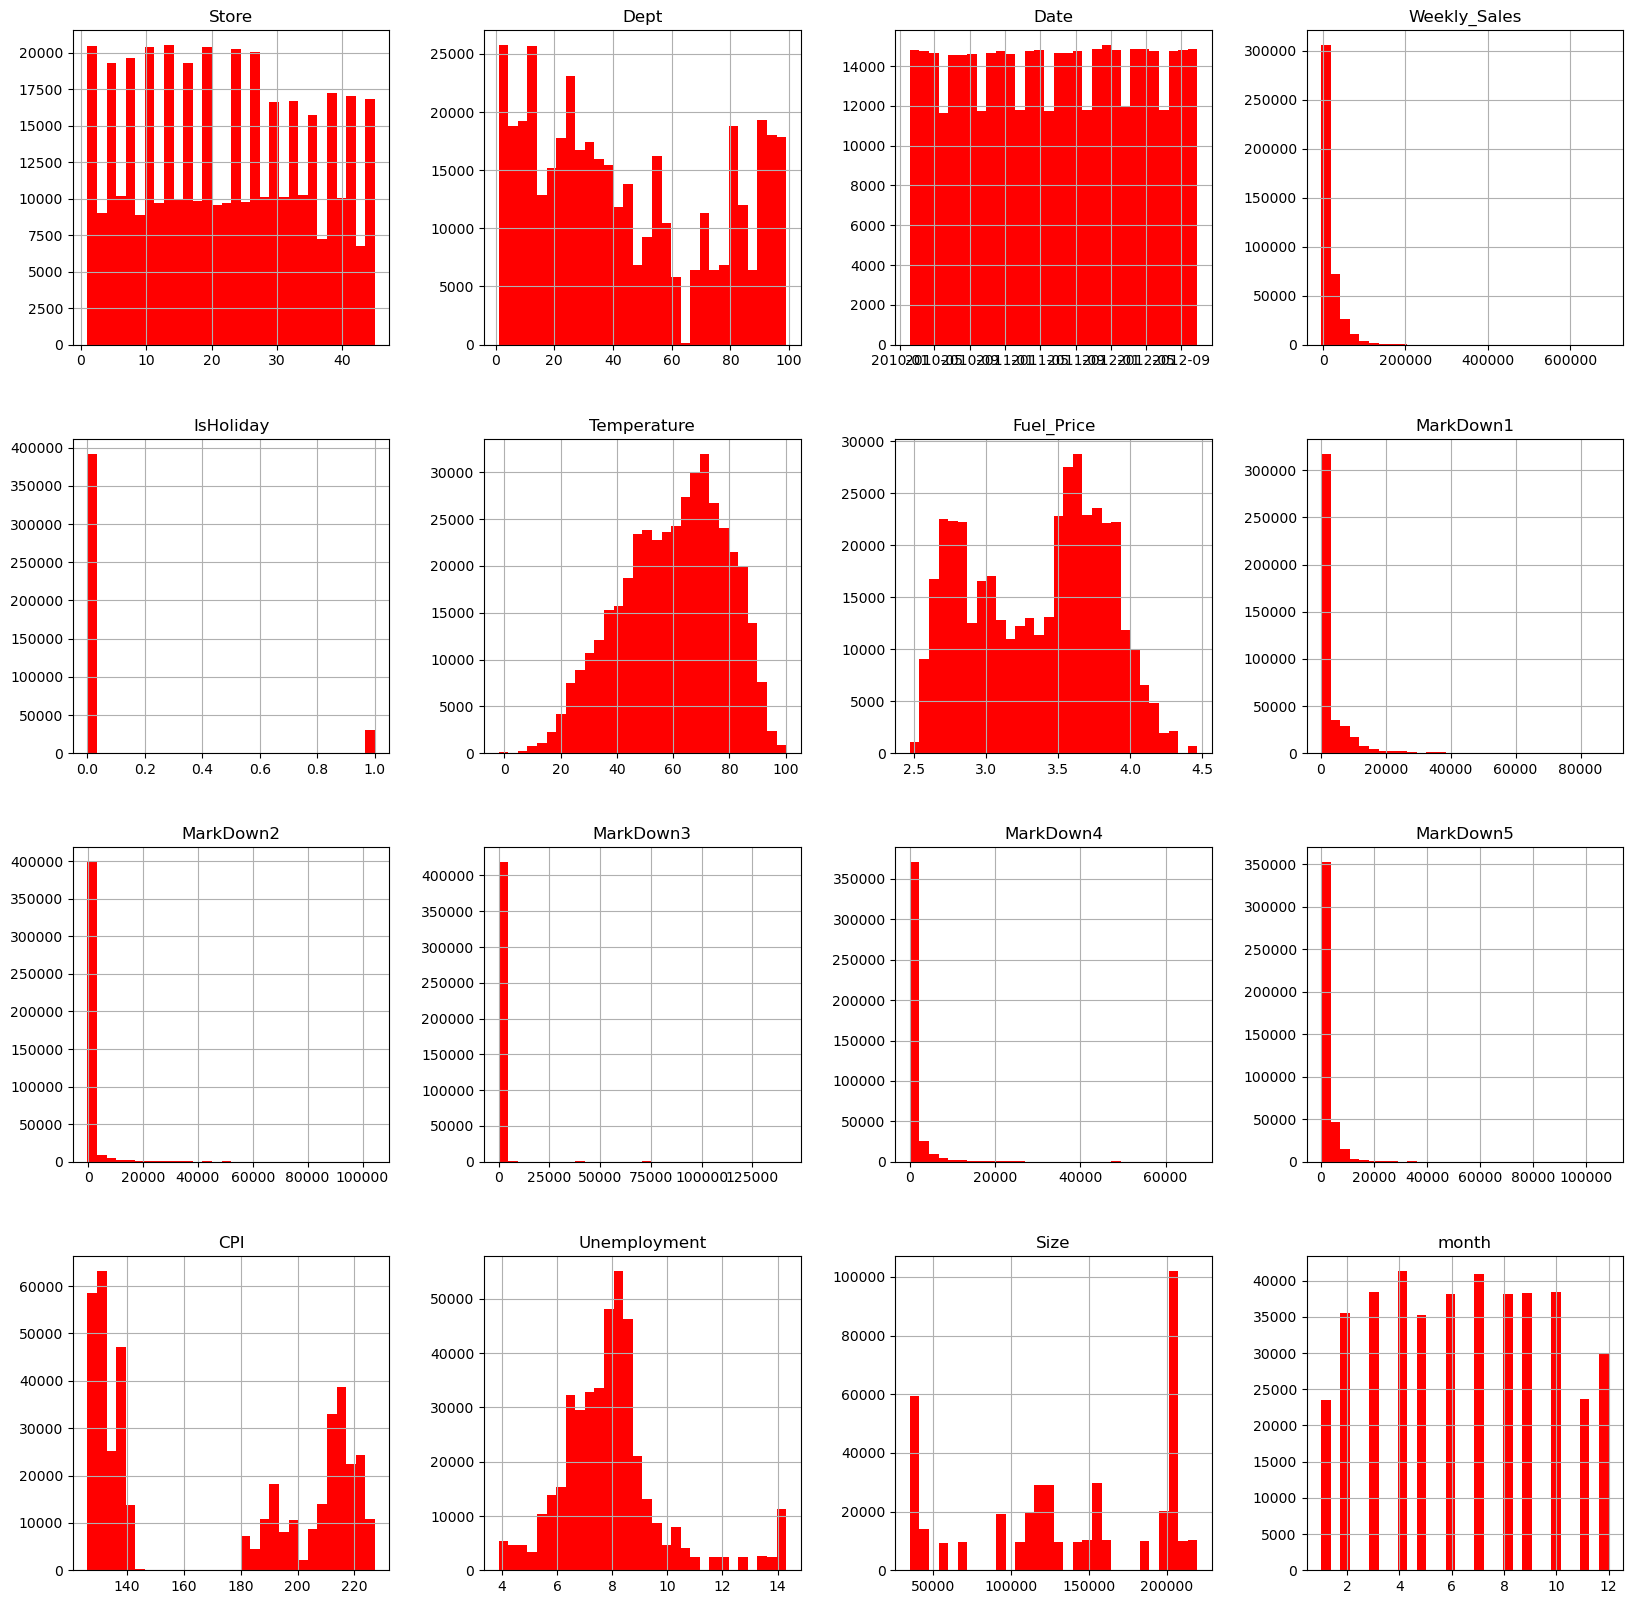

In [49]:
df.hist(bins = 30, figsize = (20,20), color = 'r')

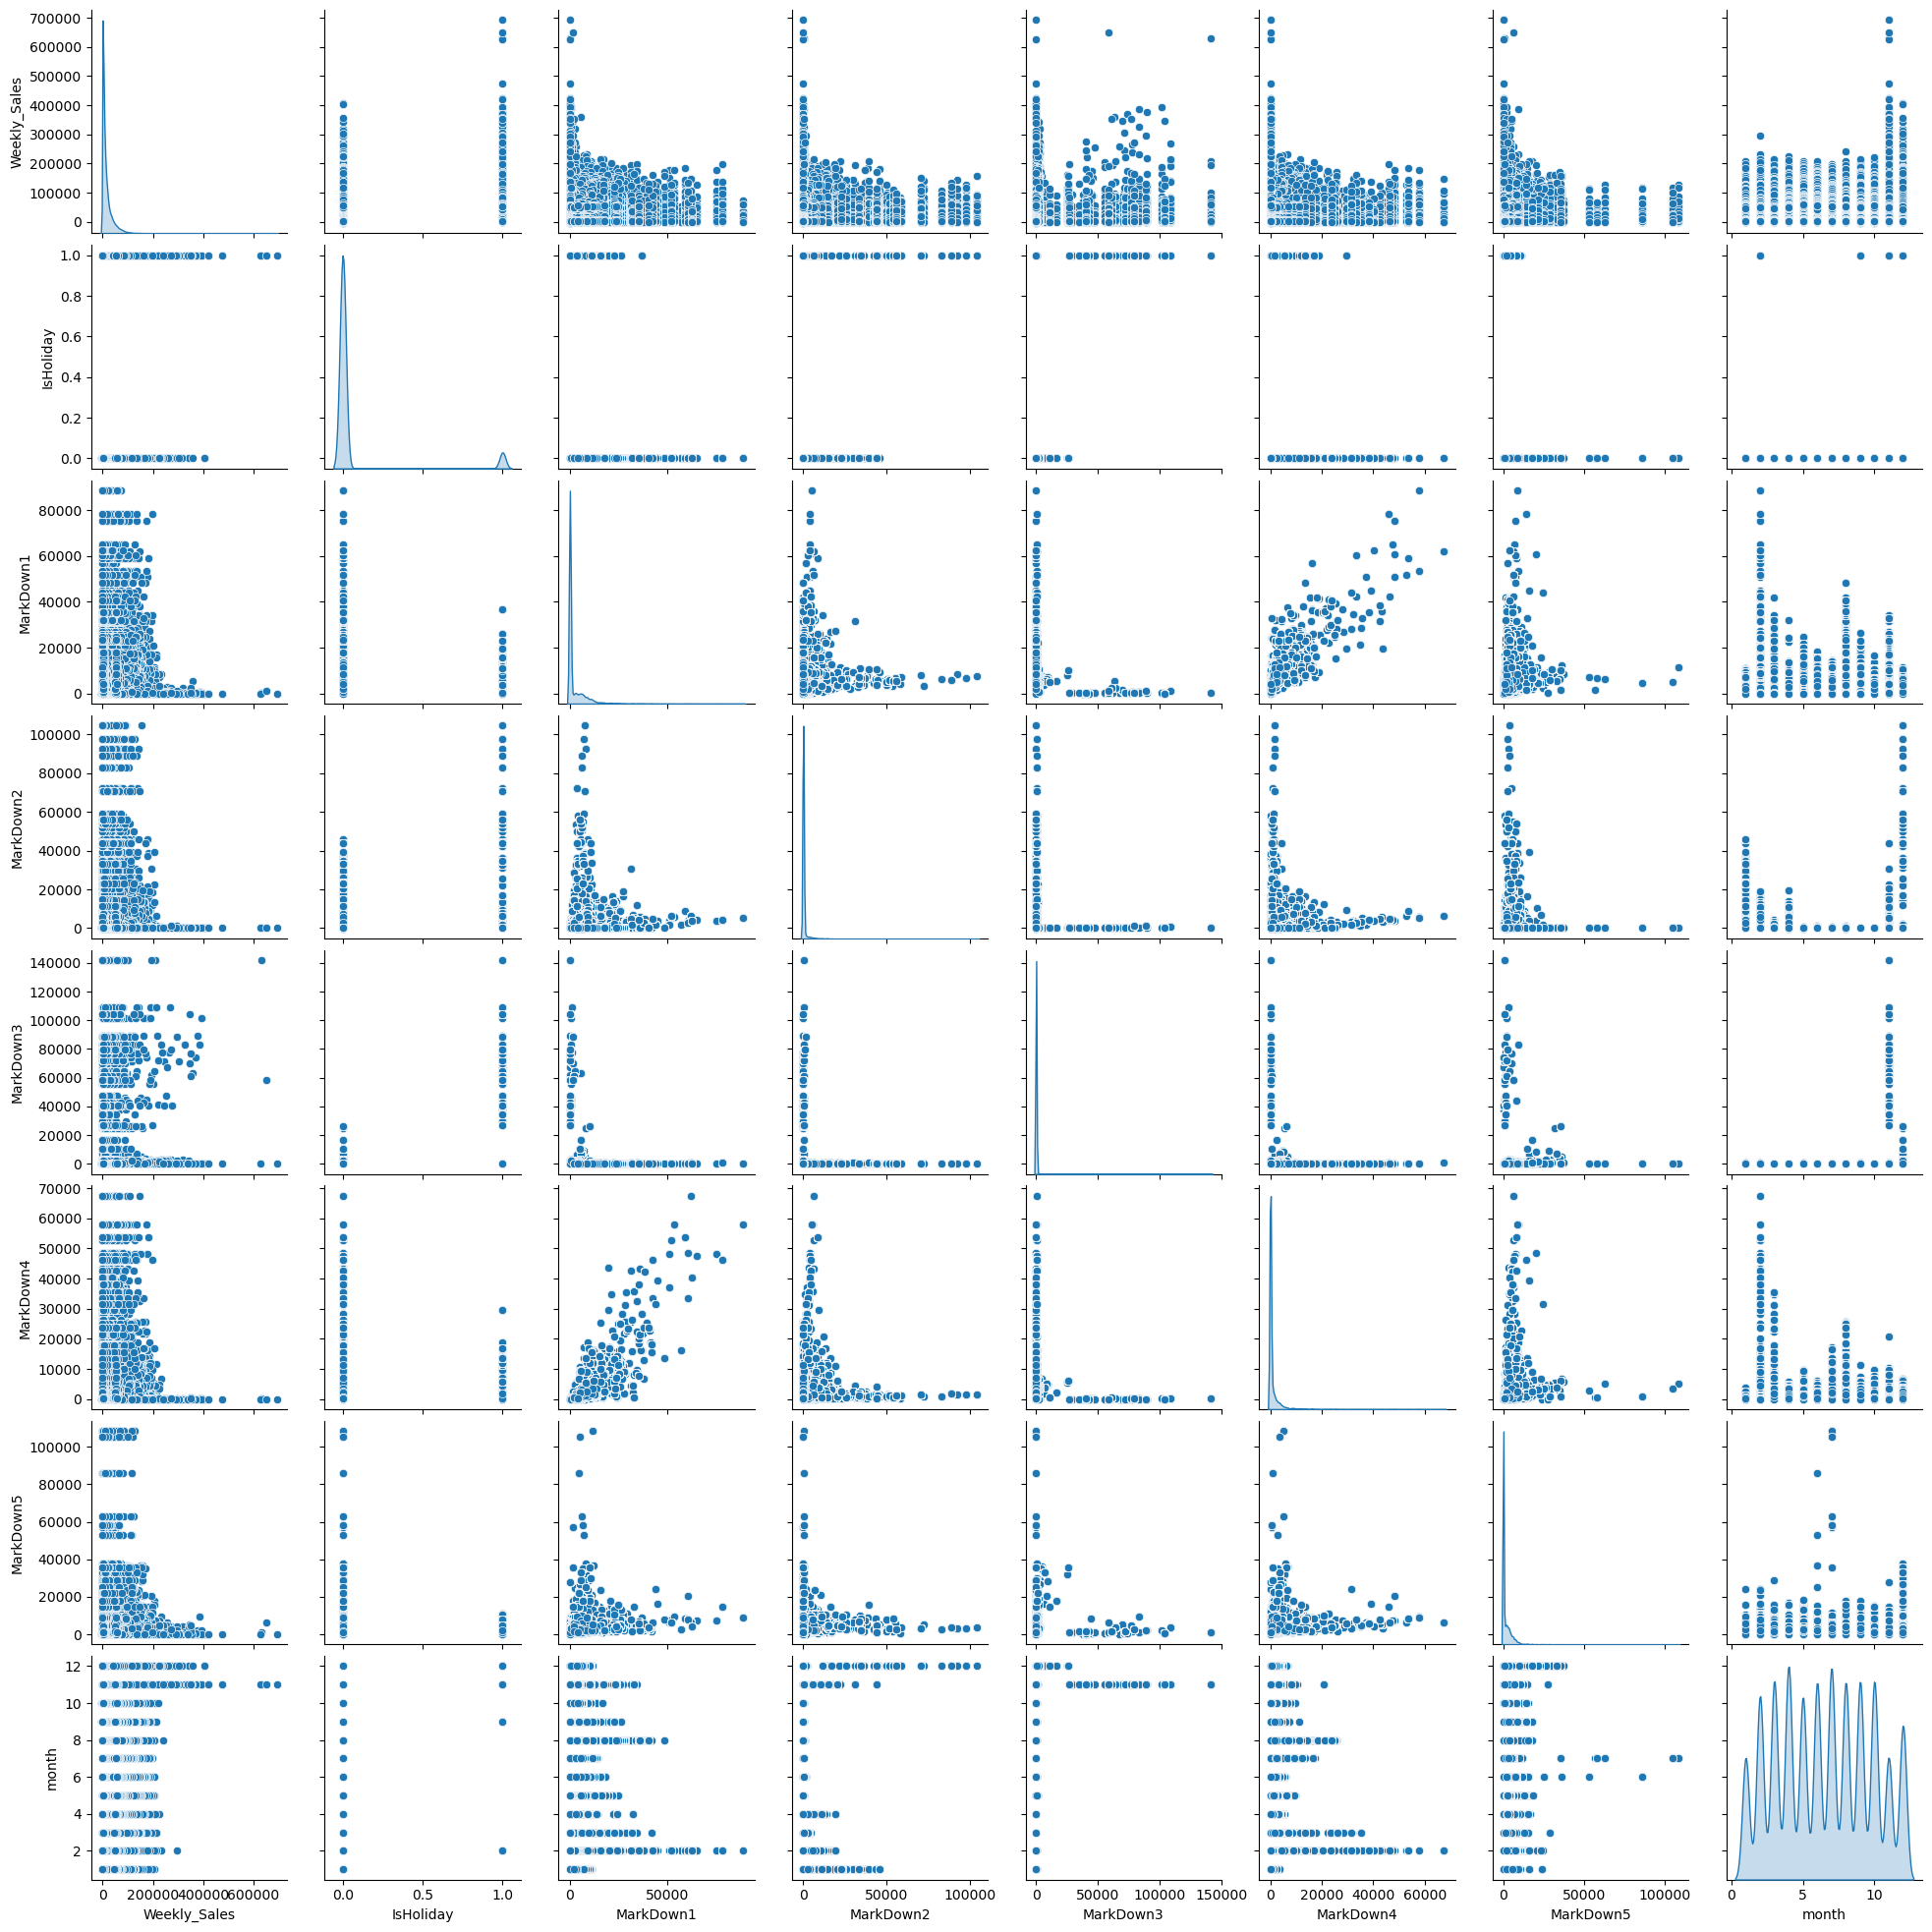

In [50]:
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","month"]], diag_kind = "kde")

In [51]:
df_type = df.groupby('Type').mean()

In [52]:
df_type

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Type,,,,,,,,,,,,,,,,
A,21.736419,44.622156,2011-06-17 15:46:40.868766208,20099.568043,0.070471,60.531945,3.343999,3102.403194,1083.216159,549.644930,1325.891281,2147.830168,174.408895,7.791595,182231.285486,6.449628
B,18.450417,43.112273,2011-06-18 02:17:20.222636800,12237.075977,0.070412,57.562951,3.382523,2553.465968,827.500452,481.215226,1043.927675,1324.921913,167.176656,7.928836,101818.735827,6.449586
C,38.942015,46.836350,2011-06-22 21:00:56.032114944,9519.532538,0.069582,67.554266,3.364654,138.960203,53.274338,5.142226,5.603993,505.826631,170.429314,8.934350,40535.725286,6.448623


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

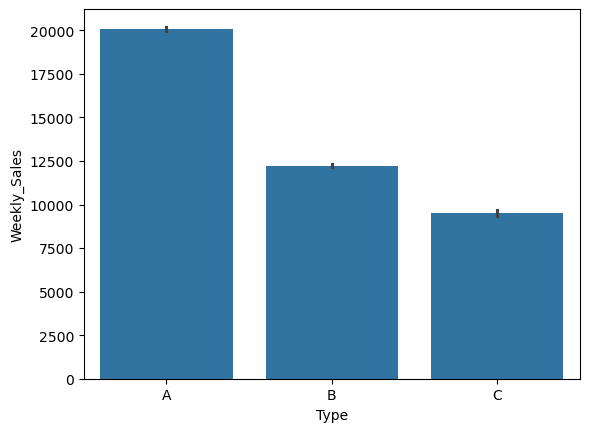

In [53]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

In [57]:
dftype = df['Type']
df = df.drop(axis = 1, columns = ['Type'])

In [61]:
dfdate = df['Date']
df = df.drop(axis = 1, columns = ['Date'])

In [62]:
df_dept = df.groupby('Dept').mean()
df_dept

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Dept,,,,,,,,,,,,,,
1,23.000000,19213.485088,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
2,23.000000,43607.020113,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
3,23.000000,11793.698516,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
4,23.000000,25974.630238,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
5,22.757366,21365.583515,0.069797,60.559367,3.365397,2462.697233,830.226332,435.134596,1022.858240,1603.738276,171.109374,7.978057,131530.357964,6.455018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,69824.423080,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
96,23.258138,15210.942761,0.069839,61.539285,3.359920,2362.845647,820.762363,397.214137,999.452087,1660.599345,171.562686,7.849295,129282.010507,6.458385
97,23.357439,14255.576919,0.069767,60.490781,3.362418,2463.638764,833.096524,432.439341,1025.957821,1591.276367,170.445933,8.043564,130676.377190,6.450781


<Axes: ylabel='Dept'>

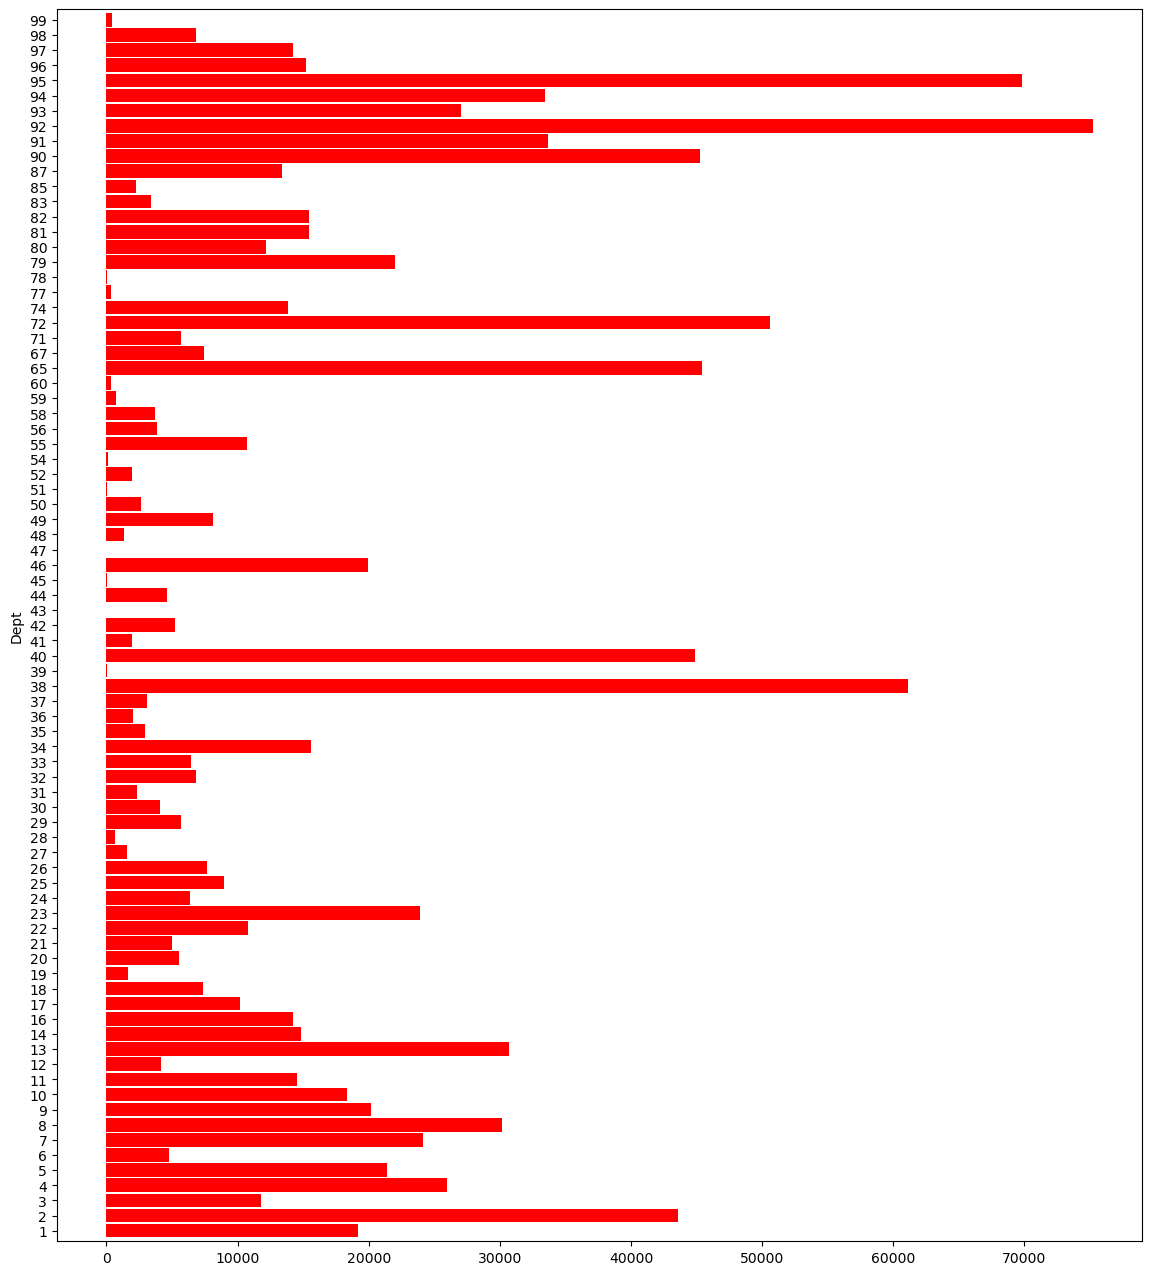

In [63]:
fig = plt.figure(figsize = (14,16))
df_dept['Weekly_Sales'].plot(kind = 'barh', color = 'r', width = 0.9)

<Axes: ylabel='Dept'>

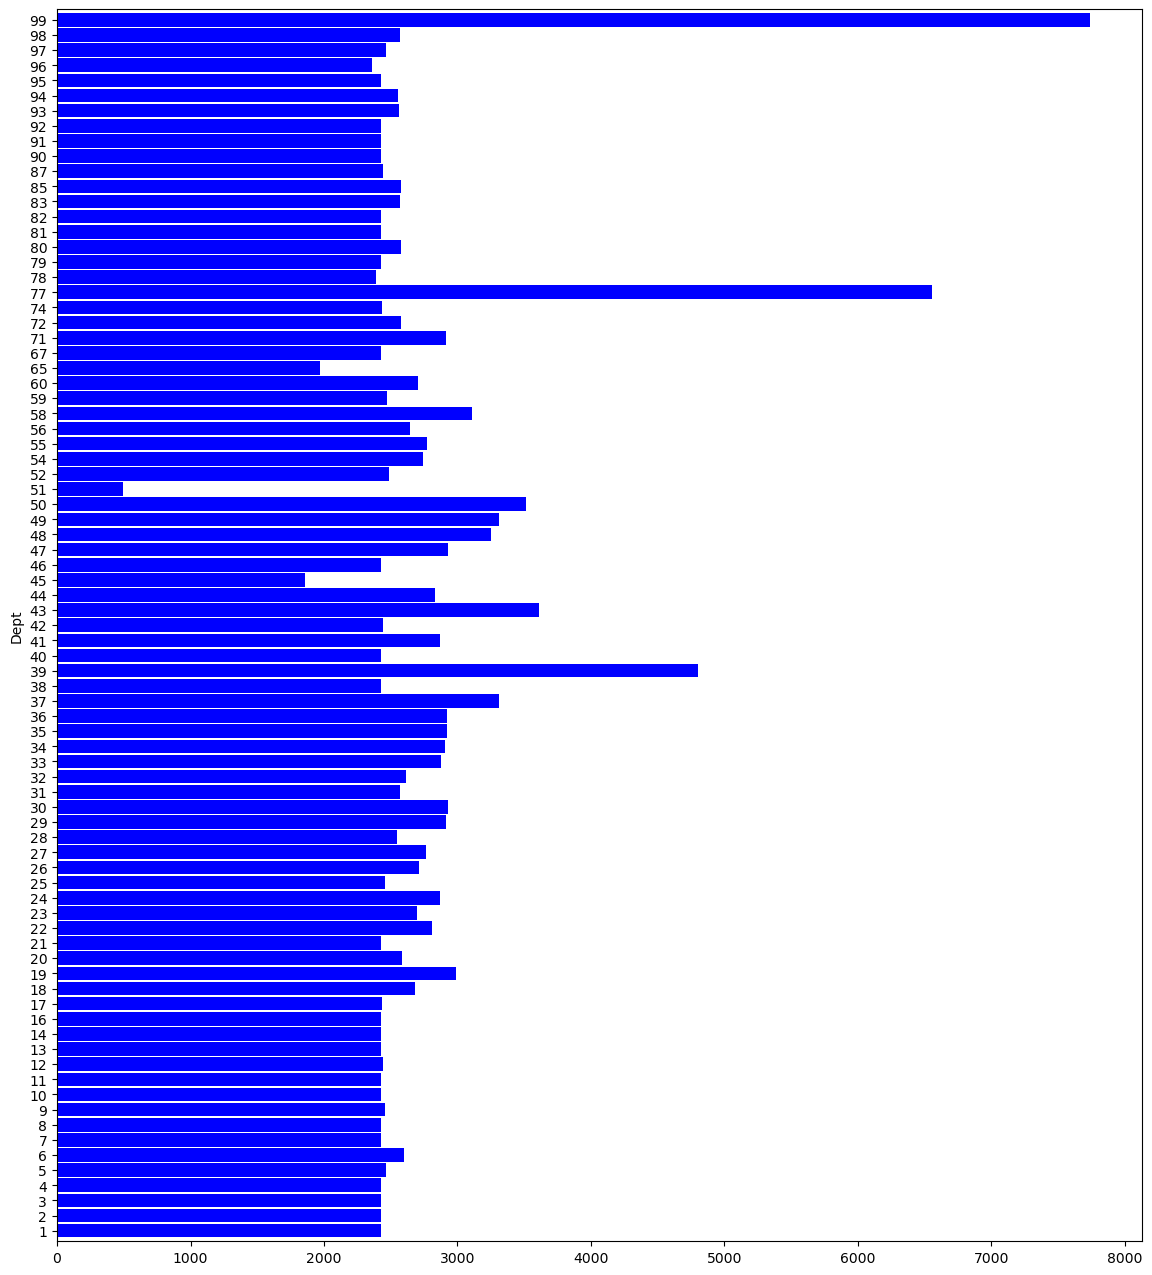

In [64]:
fig = plt.figure(figsize = (14,16))
df_dept['MarkDown1'].plot(kind = 'barh', color = 'blue', width = 0.9)

<Axes: ylabel='Dept'>

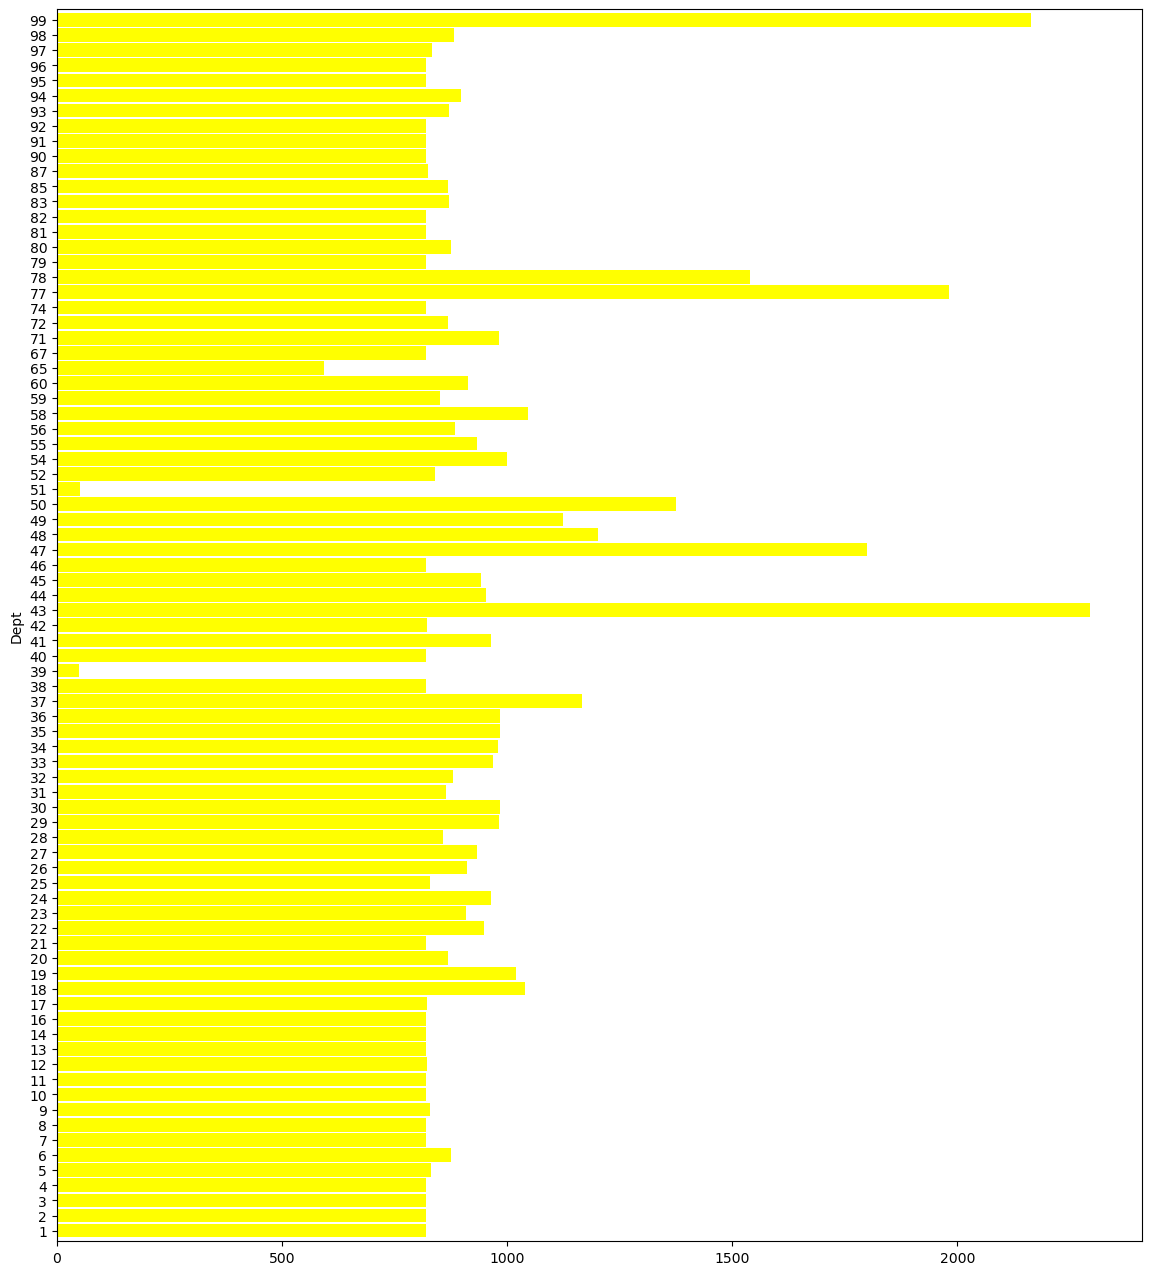

In [65]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown2'].plot(kind = 'barh', color = 'yellow', width = 0.9)

<Axes: ylabel='Dept'>

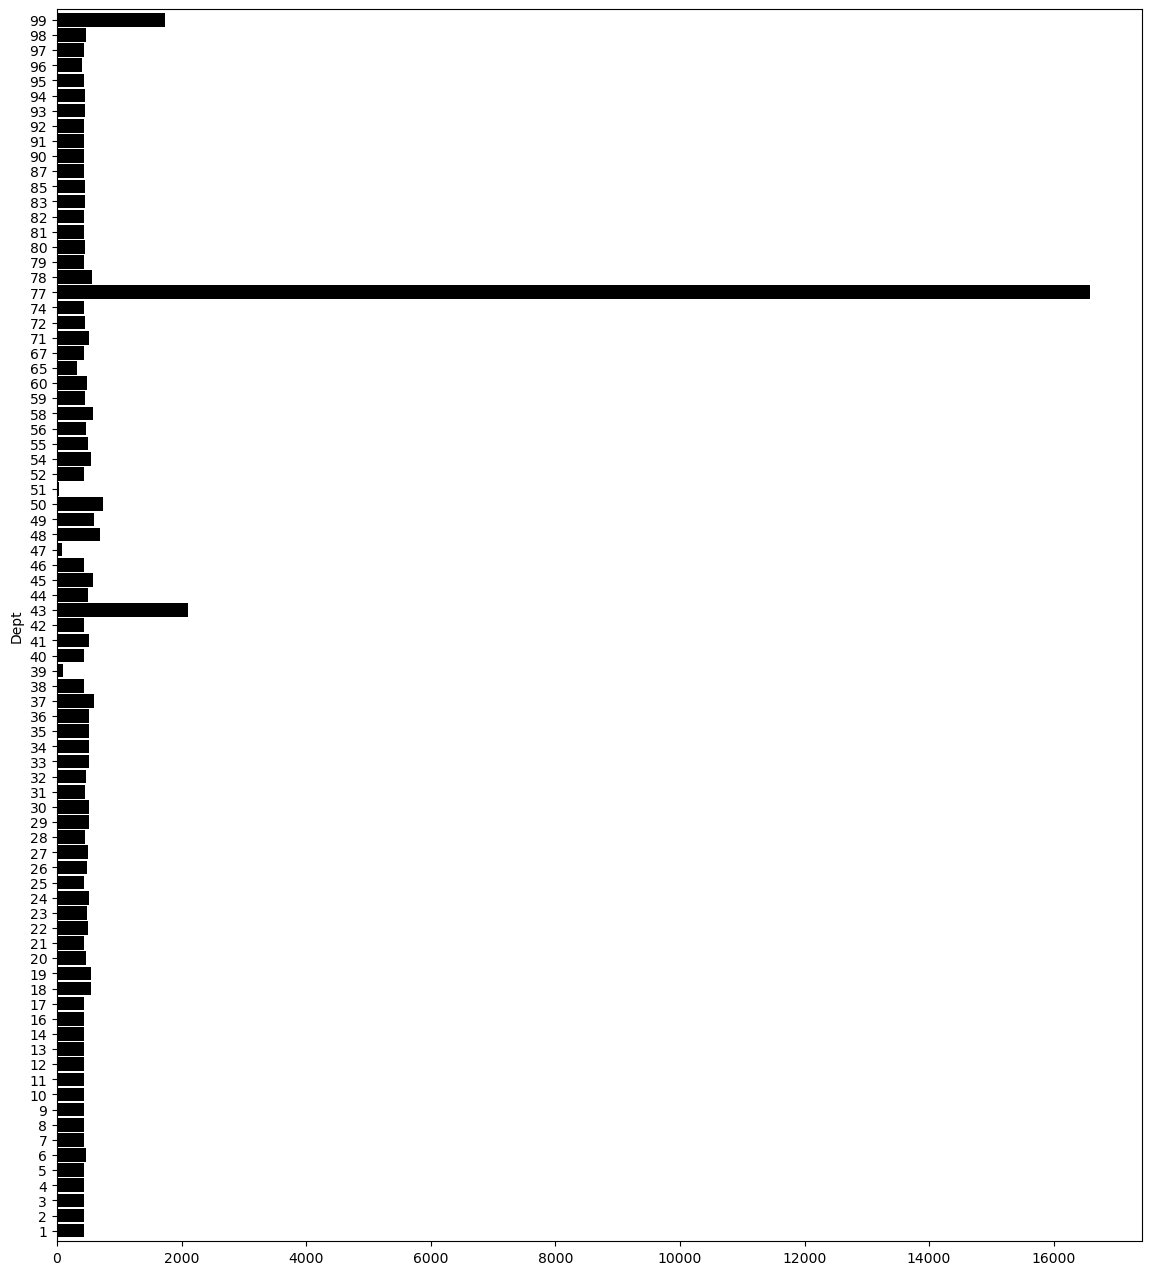

In [66]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown3'].plot(kind = 'barh', color = 'black', width = 0.9)

<Axes: ylabel='Dept'>

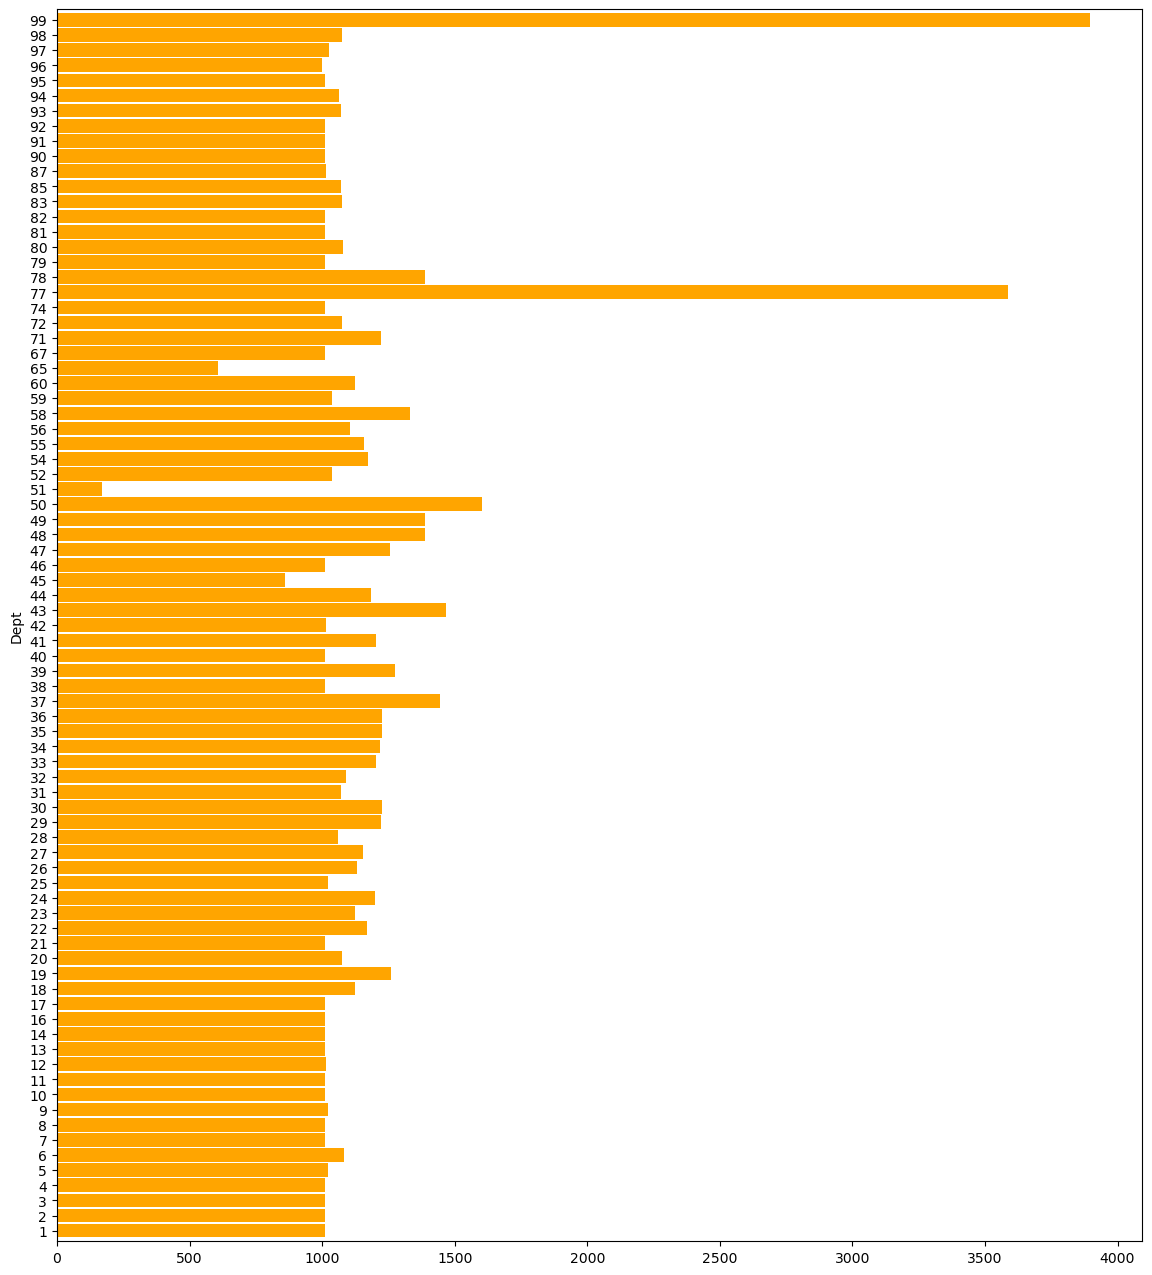

In [67]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown4'].plot(kind = 'barh', color = 'orange', width = 0.9)

<Axes: ylabel='Dept'>

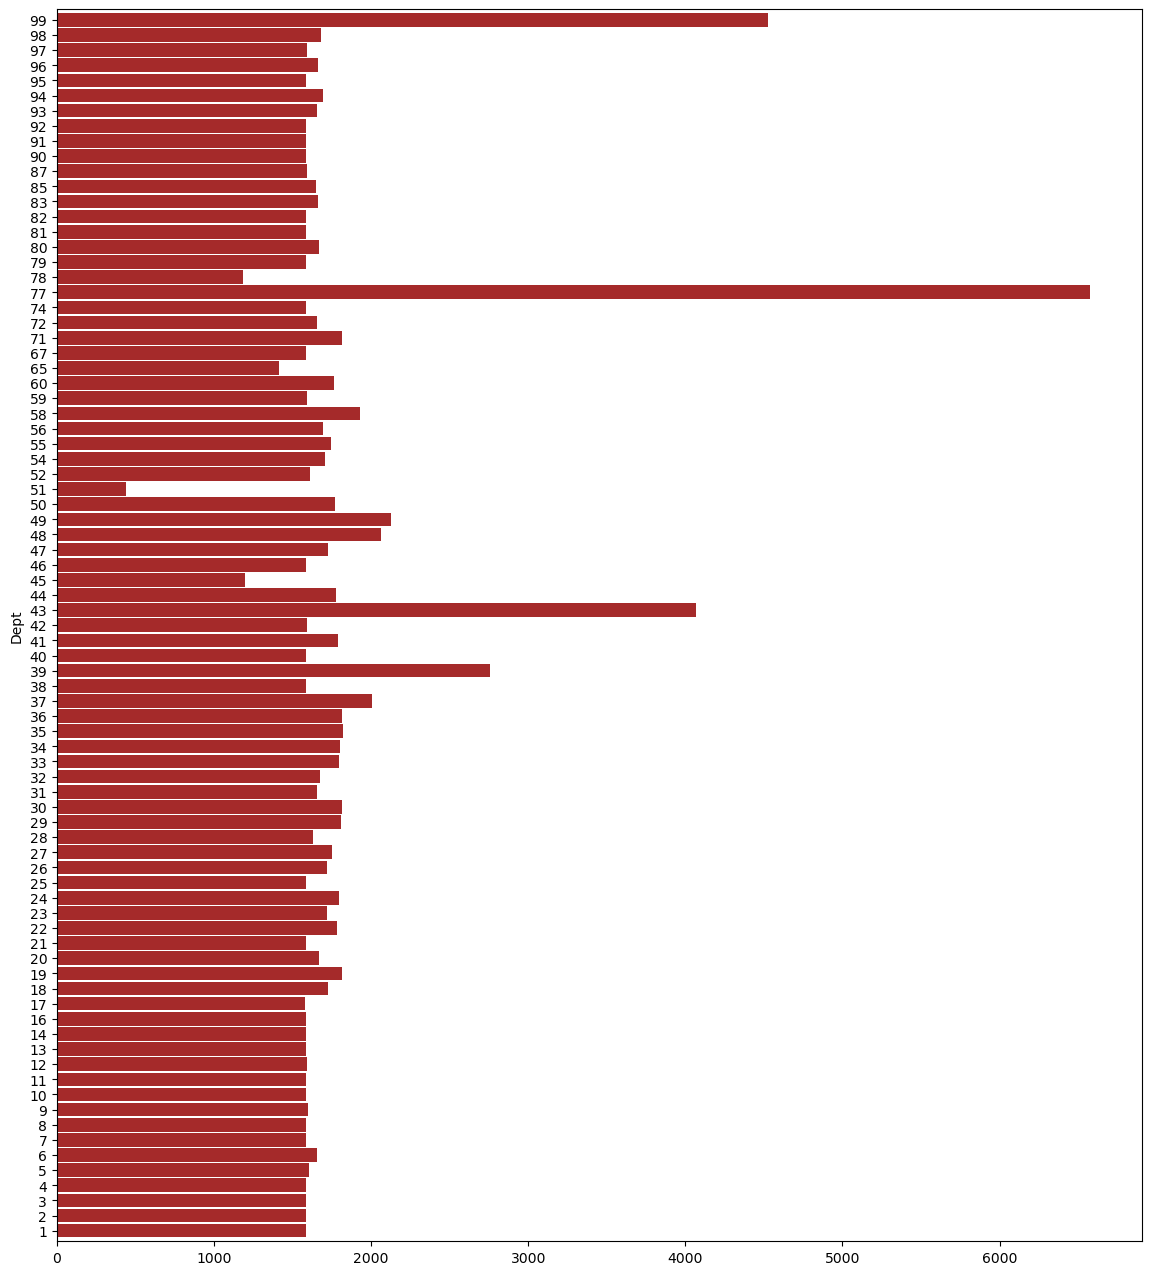

In [68]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown5'].plot(kind = 'barh', color = 'brown', width = 0.9)

In [69]:
# Sort by weekly sales
df_dept_sale = df_dept.sort_values(by = ['Weekly_Sales'], ascending = True)
df_dept_sale['Weekly_Sales'][:30]

Dept
47      -7.682554
43       1.193333
78       7.296638
39      11.123750
51      21.931729
45      23.211586
54     108.305985
77     328.961800
60     347.370229
99     415.487065
28     618.085116
59     694.463564
48    1344.893576
27    1583.437727
19    1654.815030
52    1928.356252
41    1965.559998
36    2022.571061
85    2264.359407
31    2339.440287
50    2658.897010
35    2921.044946
37    3111.076193
83    3383.349838
58    3702.907419
56    3833.706211
30    4118.197208
12    4175.397021
44    4651.729658
6     4747.856188
Name: Weekly_Sales, dtype: float64

In [71]:
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales'])


In [ ]:
df_final = pd.concat([df_final, dftype], axis=1)

In [73]:
df_final = pd.get_dummies(df_final, columns = ['Store','Dept','Type'], drop_first = True)

In [74]:
df_final.shape

(421570, 136)

In [75]:
df_final

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,...,False,False,False,False,False,False,False,False,False,False
2,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,...,False,False,False,False,False,False,False,False,False,False
3,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,...,False,False,False,False,False,False,False,False,False,False
4,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,...,False,False,False,False,False,False,False,False,True,False
421566,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,...,False,False,False,False,False,False,False,False,True,False
421567,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,...,False,False,False,False,False,False,False,False,True,False
421568,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [ ]:
y = 